<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#生成に関するパターン" data-toc-modified-id="生成に関するパターン-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>生成に関するパターン</a></span><ul class="toc-item"><li><span><a href="#Factory-Method" data-toc-modified-id="Factory-Method-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Factory Method</a></span></li><li><span><a href="#Abstract-Factory" data-toc-modified-id="Abstract-Factory-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Abstract Factory</a></span></li><li><span><a href="#Singleton" data-toc-modified-id="Singleton-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Singleton</a></span></li><li><span><a href="#Builder" data-toc-modified-id="Builder-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Builder</a></span></li><li><span><a href="#Prototype" data-toc-modified-id="Prototype-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Prototype</a></span></li></ul></li><li><span><a href="#構造に関するパターン" data-toc-modified-id="構造に関するパターン-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>構造に関するパターン</a></span><ul class="toc-item"><li><span><a href="#Composite" data-toc-modified-id="Composite-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Composite</a></span></li><li><span><a href="#Adapter" data-toc-modified-id="Adapter-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Adapter</a></span><ul class="toc-item"><li><span><a href="#継承を用いたパターン" data-toc-modified-id="継承を用いたパターン-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>継承を用いたパターン</a></span></li><li><span><a href="#委譲を用いたパターン" data-toc-modified-id="委譲を用いたパターン-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>委譲を用いたパターン</a></span></li></ul></li><li><span><a href="#Decorator" data-toc-modified-id="Decorator-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Decorator</a></span></li><li><span><a href="#Bridge" data-toc-modified-id="Bridge-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Bridge</a></span></li></ul></li><li><span><a href="#振る舞いに関するパターン" data-toc-modified-id="振る舞いに関するパターン-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>振る舞いに関するパターン</a></span><ul class="toc-item"><li><span><a href="#Iterator" data-toc-modified-id="Iterator-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Iterator</a></span></li><li><span><a href="#Strategy" data-toc-modified-id="Strategy-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Strategy</a></span></li></ul></li></ul></div>

# 生成に関するパターン

参考にしたサイト  
https://qiita.com/nirperm/  
http://atsuya046.hatenablog.com/  
https://python.civic-apps.com/  
https://ja.wikipedia.org/wiki/  

## Factory Method

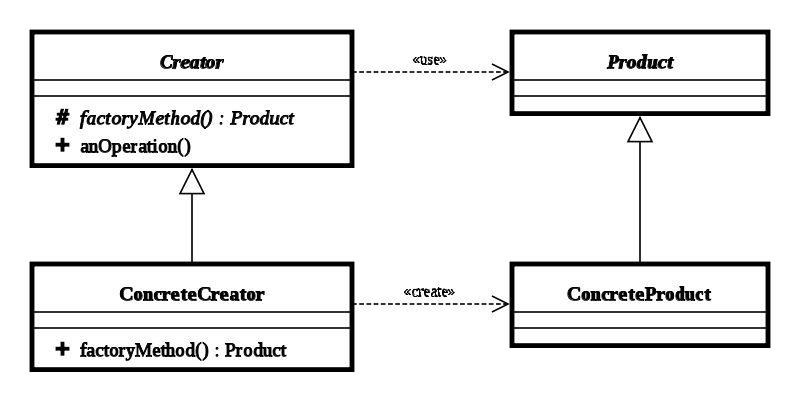

In [20]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Factory_Method_UML_class_diagram.svg/800px-Factory_Method_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

既存のオブジェクトを新しい Decorator オブジェクトでラップすることである。   
その方法として、Decorator のコンストラクタの引数でラップ対象の Component オブジェクトを読み込み、  
コンストラクタの内部でそのオブジェクトをメンバに設定する。
Decorator パターンは、既存のクラスを拡張する際にクラスの継承の代替手段として用いられる。  
継承がコンパイル時に機能を拡張するのに対し、Decorator パターンはプログラムの実行時に機能追加をする点が異なる。

他のクラスのコンストラクタをサブクラスで上書き可能な自分のメソッドに置き換えることで、  
アプリケーションに特化したオブジェクトの生成をサブクラスに追い出し、クラスの再利用性を高めることを目的とする。

Virtual Constructor パターンとも呼ばれる

In [52]:
from abc import ABCMeta, abstractmethod

class Factory(metaclass=ABCMeta):
    '''Creator'''
    @abstractmethod
    def create(self, owner):
        pass

class Product(metaclass=ABCMeta):
    '''Product'''
    @abstractmethod
    def write(self):
        pass
    
class Word(Product):
    '''ConcreteProduct'''
    def __init__(self, word):
        self.word = word

    def write(self):
        return self.word

class UpperCaseFactory(Factory):
    '''ConcreteCreator'''
    def __init__(self):
        pass

    def create(self, word):
        print('"' + word + '"' + ' is created')
        return Word(word.upper())

if __name__ == '__main__':
    factory = UpperCaseFactory()
    word1 = factory.create('i')
    word2 = factory.create('am')
    word3 = factory.create('awesome!')

    print(' '.join([word1.write(), word2.write(), word3.write()]))

"i" is created
"am" is created
"awesome!" is created
I AM AWESOME!


## Abstract Factory

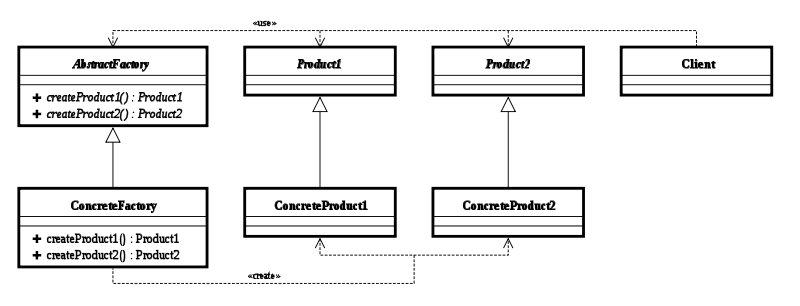

In [5]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Abstract_Factory_UML_class_diagram.svg/800px-Abstract_Factory_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=800, height=500)

In [10]:
from abc import ABCMeta, abstractmethod

class Button(metaclass=ABCMeta):
    @abstractmethod
    def paint(self):
        pass

class WindowsButton(Button):
    def paint(self):
        return "Render a button in a Windows style"

class MacOSButton(Button):
    def paint(self):
        return "Render a button in a MacOS style"

class GUIFactory(metaclass=ABCMeta):
    @abstractmethod
    def create_button(self):
        pass

class WindowsFactory(GUIFactory):
    def create_button(self):
        return WindowsButton()

class MacOSFactory(GUIFactory):
    def create_button(self):
        return MacOSButton()

factory1 = MacOSFactory()
factory2 = WindowsFactory()
button1 = factory1.create_button()
button2 = factory2.create_button()
print(button1.paint())
print(button2.paint())

Render a button in a MacOS style
Render a button in a Windows style


## Singleton

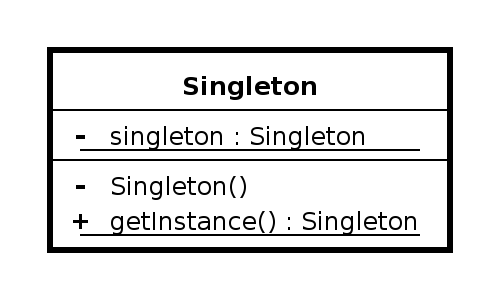

In [2]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Singleton_UML_class_diagram.svg/500px-Singleton_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=400, height=300)

In [5]:
class Singleton(object):
    __instance = None

    def __new__(cls, *args, **keys):
        if not cls.__instance:
            cls.__instance = object.__new__(cls)
        return cls.__instance

    def __init__(self, name):
        self.__name = name

    def get_name(self):
        return self.__name

if __name__ == '__main__':
    s1 = Singleton('aaa')
    s2 = Singleton('bbb')
    print(id(s1), id(s2))
    print(s1.get_name(), s2.get_name())


139710925179312 139710925179312
bbb bbb


## Builder

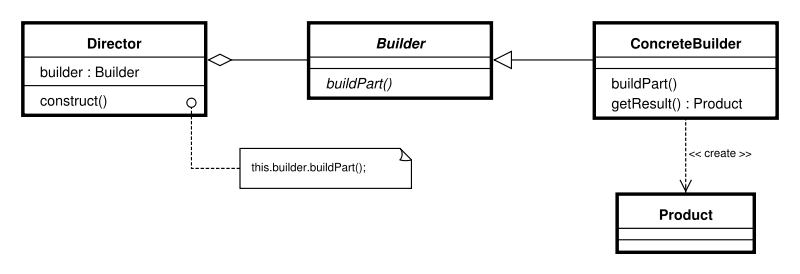

In [7]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Builder_UML_class_diagram.svg/800px-Builder_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=800, height=500)

オブジェクトの生成手順が複雑な場合に、その生成過程をカプセル化し、構造を持ったインスタンスを組み上げていく。  
また、色々なパターンのビルダーを用意することで様々なパターンの製造に対応ができ、  
複雑なメソッドの組み合わせでも、一括して実行ができます。

サンプルとして、Builderパターンを使って「文章」を作成するプログラムを作ります。  
ここで作る文章は以下のような構造を持っています。

    タイトルを1つ含む
    文字列をいくつか含む
    箇条書きの項目をいくつか含む

Builderクラスでは、文書を構成するためのメソッドを定めます。  
そして、Directorクラスがそのメソッドを使って、具体的な1つの文書を作ります、

Builderクラスは抽象クラスで、実際の処理は書かれていません。抽象メソッドが宣言されているだけです。  
文章作成のための具体的な処理を決定するのは、Builderクラスのサブクラスです。

    TextBuilderクラス ・・・ プレーンテキスト（普通の文字列）を使って文書を作る
    HTMLBuilderクラス ・・・ HTMLを使って文書を作る

DirectorがTextBuilderを使うとプレーンテキストの文書ができ、HTMLBuilderを使うとHTMLの文書ができます。

In [18]:
from abc import ABCMeta, abstractmethod

class Builder(metaclass=ABCMeta):
    @abstractmethod
    def make_title(self, title):
        pass

    @abstractmethod
    def make_string(self, string):
        pass

    @abstractmethod
    def make_items(self, items):
        pass

    @abstractmethod
    def close(self):
        pass

class Director():
    def __init__(self, builder):
        self.builder = builder

    def construct(self):
        self.builder.make_title('Greeting')
        self.builder.make_string('朝から昼にかけて')
        string = ['おはようございます。', 'こんにちは。']
        self.builder.make_items(string)
        self.builder.make_string('夜に')
        string = ['こんばんは。', 'おやすみなさい。', 'さようなら。']
        self.builder.make_items(string)
        self.builder.close()

class TextBuilder(Builder):
    buffer = []

    def make_title(self, title):
        self.buffer.append('=' * 20)
        self.buffer.append('[' + title + ']\n')
        self.buffer.append('\n')

    def make_string(self, string):
        self.buffer.append('■' + string + '\n')
        self.buffer.append('\n')

    def make_items(self, items):
        for i in range(0, len(items)):
            self.buffer.append('●' + items[i] + '\n')
        self.buffer.append('\n')

    def close(self):
        self.buffer.append('=' * 20)

    def get_result(self):
        for b in self.buffer:
            print(b)

class HTMLBuilder(Builder):
    buffer = []

    def make_title(self, title):
        self.buffer.append('<!DOCTYPE html><html><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><title>' + title + '</title></head><body>')
        self.buffer.append('<h1>' + title + '<h1>')

    def make_string(self, string):
        self.buffer.append('<h1>' + string + '</p>')

    def make_items(self, items):
        self.buffer.append('<ul>')
        for i in range(0, len(items)):
            self.buffer.append('<li>' + items[i] + '</li>')
        self.buffer.append('</ul>')

    def close(self):
        self.buffer.append('</body></html>')

    def get_result(self):
        for b in self.buffer:
            print(b)

if __name__ == "__main__":
    director = Director(TextBuilder())
    director.construct()
    result = text_builder.get_result()
    print(result)
    director = Director(TextBuilder())
    director.construct()
    result = html_builder.get_result()
    print(result)


[Greeting]



■朝から昼にかけて



●おはようございます。

●こんにちは。



■夜に



●こんばんは。

●おやすみなさい。

●さようなら。



None
<!DOCTYPE html><html><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><title>Greeting</title></head><body>
<h1>Greeting<h1>
<h1>朝から昼にかけて</p>
<ul>
<li>おはようございます。</li>
<li>こんにちは。</li>
</ul>
<h1>夜に</p>
<ul>
<li>こんばんは。</li>
<li>おやすみなさい。</li>
<li>さようなら。</li>
</ul>
</body></html>
None


## Prototype

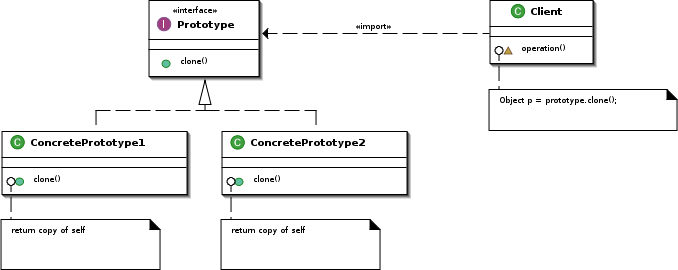

In [19]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Prototype_UML.svg/678px-Prototype_UML.svg.png'

from IPython.display import Image
Image(url, width=800, height=500)

クラスからインスタンスをつくるのではなく、インスタンスをコピーすることで、
インスタンスから別のインスタンスをつくるというもの。

生成されるオブジェクトの種別がプロトタイプ（典型）的なインスタンスであるときに使用され、  
このプロトタイプを複製して新しいオブジェクトを生成する。

このパターンは
* Abstract Factory パターンでなされるように、クライアント・アプリケーションにおいてオブジェクトの生成者をサブクラスにすることを回避する
* 標準的な方法（例えば'new'）で新しいオブジェクトを作ることによる固有のコストが所与のアプリケーションにとって高すぎる時にそれを回避する

ために用いられる。

このパターンを実装するには、clone()メソッドを指定する抽象的（abstract）な基底クラスを宣言する。  
「多態性を持つコンストラクタ」の能力を必要とする全てのクラスは抽象的な基底クラスから自身を派生させ、clone()の操作を実装する。


In [25]:
import copy
from abc import ABCMeta, abstractmethod
        
class Product(metaclass=ABCMeta):
    @abstractmethod
    def use(self, s):
        pass
    @abstractmethod
    def createClone(self):
        pass

class Manager(object):
    showcase = dict()
    def register(self, name, proto):
        self.showcase[name] = proto
    def create(self, protoname):
        p = self.showcase.get(protoname)
        return p.createClone()

class MessageBox(Product):
    def __init__(self, decochar):
        self.decochar = decochar
    def use(self, s):
        length = len(s)
        deco = self.decochar * (length + 4 )
        print(deco)
        print(self.decochar,s,self.decochar)
        print(deco)
    
    def createClone(self):
        p = copy.deepcopy(self)
        return p

class UnderlinePen(Product):
    def __init__(self, ulchar):
        self.ulchar = ulchar
    
    def use(self, s):
        length = len(s)
        print('"%s"' %s)
        print(" %s " %(self.ulchar * length))
    
    def createClone(self):
        p = copy.deepcopy(self)
        return p


if __name__== "__main__":
    manager = Manager()
    upen = UnderlinePen("~")
    mbox = MessageBox("*")
    sbox = MessageBox("/")
    manager.register("strong message", upen)
    manager.register("warning box", mbox)
    manager.register("slash box", sbox)
    
    p1 = manager.create("strong message")
    p1.use("Hello, world.")
    p2 = manager.create("warning box")
    p2.use("Hello, world.")
    p3 = manager.create("slash box")
    p3.use("Hello, world.")


"Hello, world."
 ~~~~~~~~~~~~~ 
*****************
* Hello, world. *
*****************
/////////////////
/ Hello, world. /
/////////////////


# 構造に関するパターン

## Composite

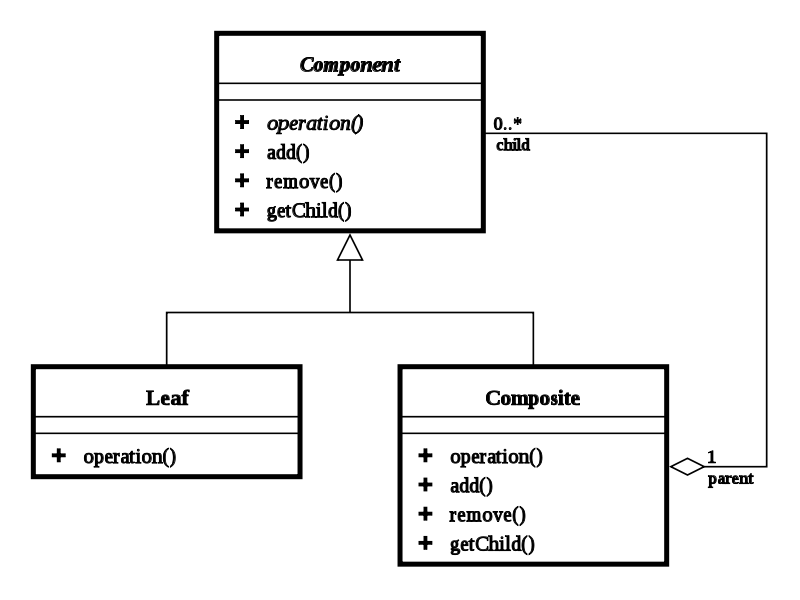

In [54]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Composite_UML_class_diagram.svg/800px-Composite_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

1つの抽象クラスがプリミティブとコンテナの両方を表すこと。

幸いな事に、Compositeパターンには犯しやすい間違いが１つしかありません。
そして悪い事に、多くの人がその間違いをよく犯します。
ツリーの深さが１段しかない、
つまりコンポジットオブジェクトの子コンポーネントが全て葉オブジェクトである
と想定してしまうのです。

Compositeパターンには、一つの決断をしなくてはいけません。

つまり、葉のオブジェクトでadd_sub_taskやremove_sub_taskをどう扱うかです。

1. 子を扱わないのだから、add_sub_task等は実装しない
1. add_sub_task等を呼び出そうとしたら例外を投げる
1. add_sub_task等を呼び出しても無視する

Compositeパターンのゴールは、全階層のオブジェクトを同じように扱えるようにする事です。
しかし、葉とコンポジットオブジェクトは同じではないのです。
『Rubyによるデザインパターン』の作者は１．（実装しない）が良いという意見です。


In [2]:
class Graphic:
    def render(self):
        raise NotImplementedError("You should implement this.")

class CompositeGraphic(Graphic):
    def __init__(self):
        self.graphics = []

    def render(self):
        #再帰的にrender()を呼び出す
        for graphic in self.graphics:
            graphic.render()

    def add(self, graphic):
        self.graphics.append(graphic)

    def remove(self, graphic):
        self.graphics.remove(graphic)

class Ellipse(Graphic):
    def __init__(self, name):
        self.name = name

    def render(self):
        print("Ellipse: {}".format(self.name))

if __name__ == '__main__':
    ellipse1 = Ellipse("1")
    ellipse2 = Ellipse("2")
    ellipse3 = Ellipse("3")
    ellipse4 = Ellipse("4")

    graphic1 = CompositeGraphic()
    graphic2 = CompositeGraphic()

    graphic1.add(ellipse1)
    graphic1.add(ellipse2)
    graphic1.add(ellipse3)
    graphic2.add(ellipse4)

    graphic = CompositeGraphic()

    graphic.add(graphic1)
    graphic.add(graphic2)

    graphic.render()

Ellipse: 1
Ellipse: 2
Ellipse: 3
Ellipse: 4


## Adapter

既存のクラスに対して修正を加えることなく、インタフェースを変更することができる。  
Adapter パターンを実現するための手法として継承を利用した手法と委譲を利用した手法が存在する。

２つのクラス間に変換構造を作り、別の用途に使えるように変換する。  
Apdaterは中間層の役割で、使う方と、使われる方は中身を知らなくても良い。  
クラスで返すのか、インスタンスで返すのかの違いかな。

### 継承を用いたパターン

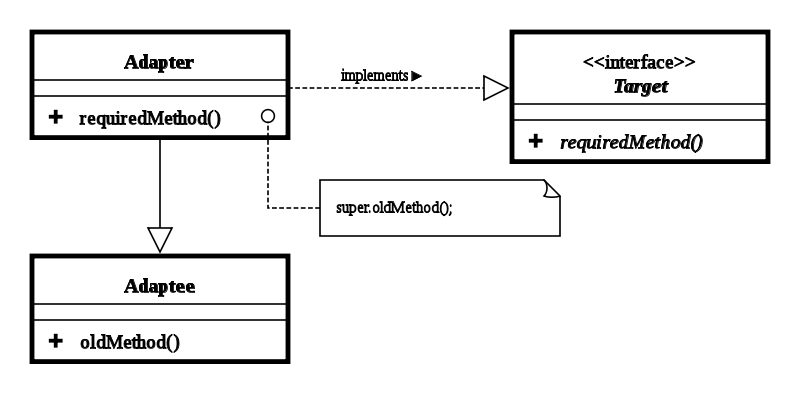

In [1]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Adapter_using_inheritance_UML_class_diagram.svg/800px-Adapter_using_inheritance_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

In [1]:
from abc import ABCMeta, abstractmethod

class Banner():

    def __init__(self, string):
        self.__string = string

    def show_with_paren(self):
        print('({0})'.format(self.__string))

    def show_with_aster(self):
        print('*{0}*'.format(self.__string))


class Printer(metaclass=ABCMeta):

    @abstractmethod
    def print_weak(self):
        pass

    @abstractmethod      
    def print_strong(self):
        pass    

class PrinterBanner(Banner):

    def __init__(self, string):
        super().__init__(string)

    def print_weak(self):
        self.show_with_paren()

    def print_strong(self):
        self.show_with_aster()
        
# 抽象クラスのPrinterへPrinterBanner登録
Printer.register(PrinterBanner)

if __name__ == '__main__':
    pb = PrinterBanner('Bye')
    pb.print_weak() 
    pb.print_strong()

(Bye)
*Bye*


### 委譲を用いたパターン

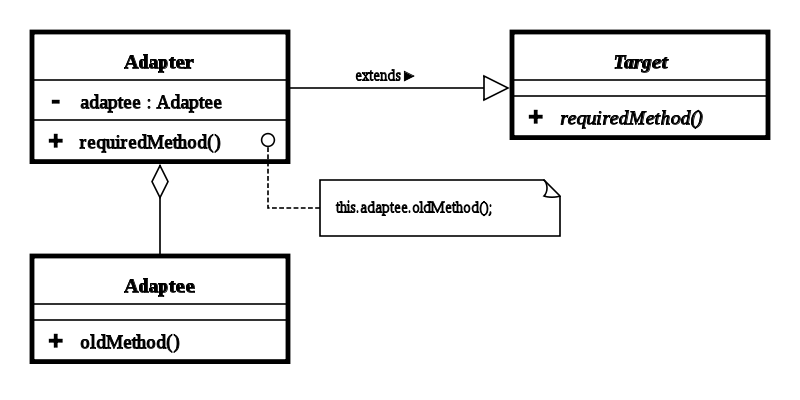

In [3]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Adapter_using_delegation_UML_class_diagram.svg/800px-Adapter_using_delegation_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

In [12]:
from abc import ABCMeta, abstractmethod

class Banner():

    def __init__(self, string):
        self.__string = string

    def show_with_paren(self):
        print('({0})'.format(self.__string))

    def show_with_aster(self):
        print('*{0}*'.format(self.__string))

class Printer(metaclass=ABCMeta):

    @abstractmethod
    def print_weak(self):
        pass

    @abstractmethod      
    def print_strong(self):
        pass    

class PrinterBanner(Printer):

    def __init__(self, string):
        self.banner = Banner(string)

    def print_weak(self):
        self.banner.show_with_paren()

    def print_strong(self):
        self.banner.show_with_aster()    
            
# 抽象クラスのPrinterへPrinterBanner登録
Printer.register(PrinterBanner)

if __name__ == '__main__':
    pb = PrinterBanner('Bye')
    pb.print_weak() 
    pb.print_strong()

(Bye)
*Bye*


## Decorator

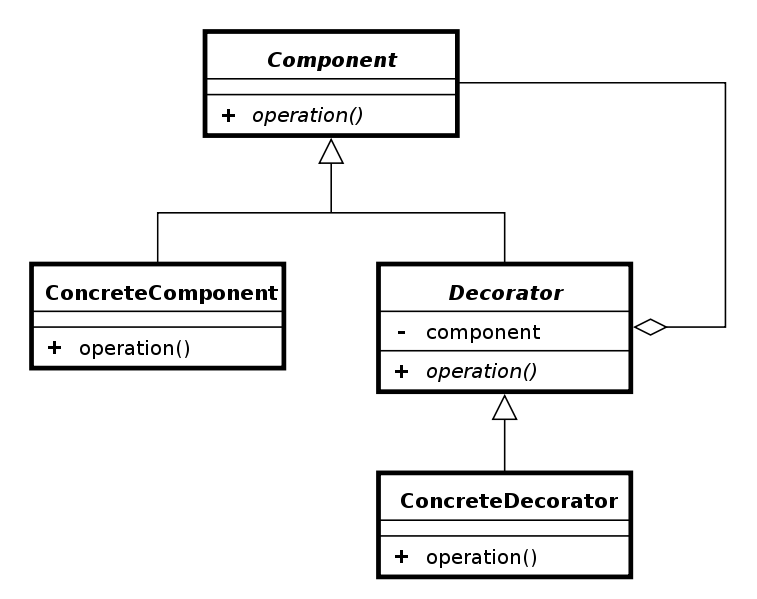

In [55]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Decorator_UML_class_diagram.svg/757px-Decorator_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

既存のオブジェクトを新しい Decorator オブジェクトでラップすることである。   
その方法として、Decorator のコンストラクタの引数でラップ対象の Component オブジェクトを読み込み、  
コンストラクタの内部でそのオブジェクトをメンバに設定する。
Decorator パターンは、既存のクラスを拡張する際にクラスの継承の代替手段として用いられる。  
継承がコンパイル時に機能を拡張するのに対し、Decorator パターンはプログラムの実行時に機能追加をする点が異なる。

In [18]:
class TextTag(object):
    """Represents a base text tag"""
    def __init__(self, text):
        self._text = text

    def render(self):
        return self._text

class BoldWrapper(TextTag):
    """Wraps a tag in <b>"""
    def __init__(self, wrapped):
        self._wrapped = wrapped

    def render(self):
        return "<b>{}</b>".format(self._wrapped.render())

class ItalicWrapper(TextTag):
    """Wraps a tag in <i>"""
    def __init__(self, wrapped):
        self._wrapped = wrapped

    def render(self):
        return "<i>{}</i>".format(self._wrapped.render())

if __name__ == '__main__':
    simple_hello = TextTag("hello, world!")
    bold_hello = BoldWrapper(simple_hello)
    special_hello = ItalicWrapper(bold_hello)
    print(simple_hello.render())
    print(bold_hello.render())
    print(special_hello.render())

hello, world!
<b>hello, world!</b>
<i><b>hello, world!</b></i>


## Bridge

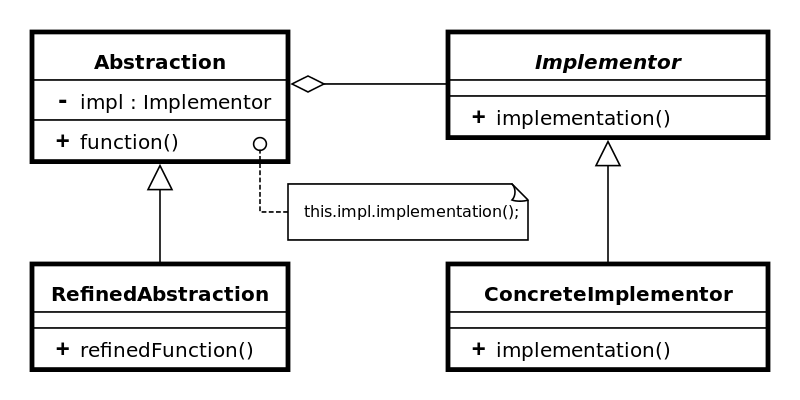

In [26]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Bridge_UML_class_diagram.svg/800px-Bridge_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

「橋渡し」のクラスを用意することによって、クラスを複数の方向に拡張させることを目的とする。  
あるクラスclsがあって、clsに新しい機能を追加する（新しいメソッドの追加）ときにはclsのサブクラスとしてcls2をつくる。

これで一段階のクラス階層ができる。さらにcls2に新しい機能を追加するならcls2のサブクラスcls3をつくる。これで二段階の

クラス階層ができて、この階層は機能の追加のためにつくられた階層となる。これを機能のクラス階層とすると。

これに対して、あるクラスclsではメソッドの宣言だけを行い、そのメソッドの実装をclsのサブクラスcls2で行った場合、clsとcls2に

よってできるクラス階層を実装のクラス階層とする。

クラス階層が１つだと機能のクラス階層と実装のクラス階層が混ざってしまい、クラス階層が複雑になりプログラムの見通しが悪く

なる危険がある。そこで、機能のクラス階層と実装のクラス階層を２つの独立したクラス階層に分けることが大事みたい。しかし、分けただけではダメで２つのクラス階層をつなぐことが必要。Bridgeパターンはそのつなぐ役割を果たす。

In [50]:
import sys
from abc import ABCMeta, abstractmethod

class Display():
    '''機能のクラス 1'''
    def __init__(self, impl):
        self.impl = impl
    def opening(self):
        self.impl.rawOpening()
    def printing(self):
        self.impl.rawPrinting()
    def closing(self):
        self.impl.rawClosing()
    def display(self):
        self.opening()
        self.printing()
        self.closing()

class CountDisplay(Display):
    '''機能のクラス 2'''
    def __init__(self, impl):
        super().__init__(impl)
        
    def multiDisplay(self, times):
        self.opening()
        for i in range(times):
            self.printing()
        self.closing()

class IncreasingDisplay(CountDisplay):
    '''機能のクラス 3'''
    def __init__(self, impl):
        super().__init__(impl)
        
    def increasing_Display(self, max_number):
        self.max_number = max_number
        for i in range(1, max_number+1):
            self.multiDisplay(i)
            
class DisplayImpl(metaclass=ABCMeta):
    '''実装のクラス 1'''
    @abstractmethod
    def rawOpening(self):
        pass
    @abstractmethod
    def rawPrinting(self):
        pass
    @abstractmethod
    def rawClosing(self):
        pass

class StringDisplayImpl(DisplayImpl):
    '''実装のクラス 2-1'''
    def __init__(self, st):
        self.st = st
        self.width = len(st)
    def rawOpening(self):
        self.printLine()
    def rawPrinting(self):
        print("|%s|" %self.st)
    def rawClosing(self):
        self.printLine()
    def printLine(self):
        print("+%s+" %("-"*self.width))

if __name__=="__main__":
    d1 = Display(StringDisplayImpl("Hello, Plainer."))
    d2 = CountDisplay(StringDisplayImpl("Hello, Counterant."))
    d3 = IncreasingDisplay(StringDisplayImpl("Hello, Increasant."))
    d1.display()
    d2.multiDisplay(4)
    d3.increasing_Display(3)

+---------------+
|Hello, Plainer.|
+---------------+
+------------------+
|Hello, Counterant.|
|Hello, Counterant.|
|Hello, Counterant.|
|Hello, Counterant.|
+------------------+
+------------------+
|Hello, Increasant.|
+------------------+
+------------------+
|Hello, Increasant.|
|Hello, Increasant.|
+------------------+
+------------------+
|Hello, Increasant.|
|Hello, Increasant.|
|Hello, Increasant.|
+------------------+


# 振る舞いに関するパターン

## Iterator

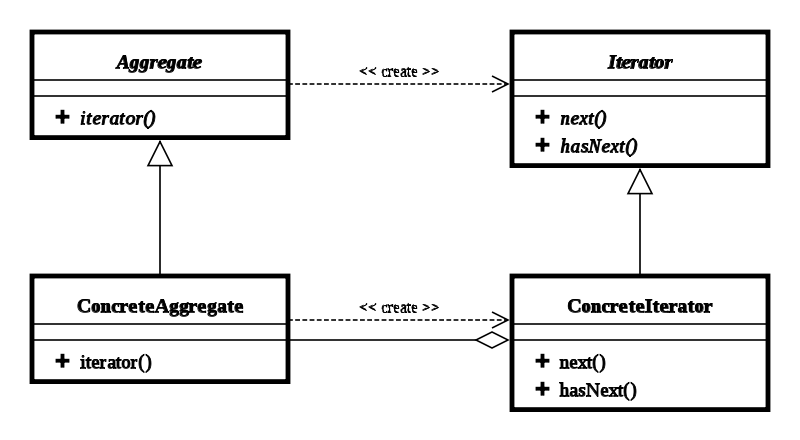

In [13]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Iterator_UML_class_diagram.svg/800px-Iterator_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

In [33]:
from abc import ABCMeta, abstractmethod

class Iterator(metaclass=ABCMeta):
    @abstractmethod
    def hasNext(self):
        pass
    
    @abstractmethod
    def next():
        pass

class ConcreteIterator(Iterator):
    def __init__(self, concreteAggregate):
        self.concreteAggregate = concreteAggregate
        self.index = 0
        
    def hasNext(self):
        if self.index < self.concreteAggregate.getSize():
            return True
        else:
            return False
        
    def next(self):
        self.index += 1
        return self.concreteAggregate.getItemAt(self.index - 1)

class Aggregate(metaclass=ABCMeta):
    @abstractmethod
    def iterator(self):
        pass
    
class ConcreteAggregate(Aggregate):
    def __init__(self):
        super()
        self.items = []
        
    def addItem(self, item):
        self.items.append(item)
        
    def getSize(self):
        return len(self.items)
    
    def getItemAt(self, index):
        return self.items[index]
    
    def iterator(self):
        return ConcreteIterator(self)

class Item():
    def __init__(self, name):
        self.name = name
        
    def Item(self, name):
        self.name = name
        
    def getName(self):
        return self.name;

if __name__ == '__main__':
    a = ConcreteAggregate()
    a.addItem(Item("A"))
    a.addItem(Item("B"))
    a.addItem(Item("C"))
    a.addItem(Item("D"))
    it = a.iterator()
    while it.hasNext():
        item = it.next()
        print(item.getName())

A
B
C
D


## Strategy

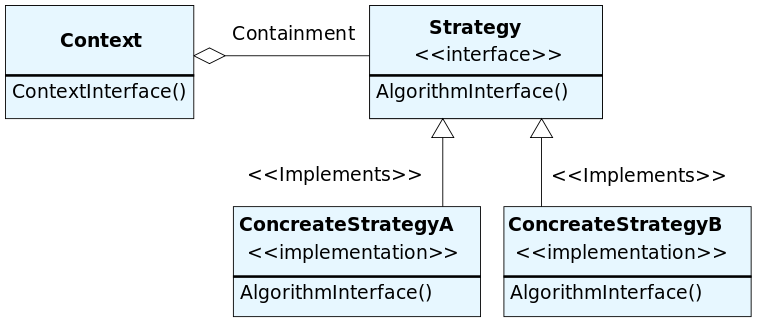

In [53]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/StrategyPatternClassDiagram.svg/757px-StrategyPatternClassDiagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

状況によってアルゴリズムを変更する必要がある場合に有効。  
if分の分岐内にアルゴリズムをかき分ける必要がなくなる。

各アルゴリズムをカプセル化しアルゴリズムを呼び出すインターフェイスのみ提供する。  
クライアントはそのアルゴリズムの実装については知っている必要がない。

In [14]:
from abc import ABCMeta, abstractmethod

class AbstractStrategy:
    def __init__(self):
        pass
        
    @abstractmethod
    def execute(self):
        pass

class ConcreteStrategy1(AbstractStrategy):
    def __init__(self):
        pass
    
    def execute(self):
        print('execute 1')

class ConcreteStrategy2(AbstractStrategy):
    def __init__(self):
        pass
        
    def execute(self):
        print('execute 2')
        
class Context():
    def __init__(self, strategy):
        self.strategy = strategy

    def execute(self):
        self.strategy.execute();
        
if __name__ == '__main__':
    context1 = Context(ConcreteStrategy1())
    context2 = Context(ConcreteStrategy2())

    context1.execute()
    context2.execute()

execute 1
execute 2
